# Imports

In [1]:
import sys
 
# setting path
sys.path.append('..')

In [2]:
from model_builder import ModelBuilder
import matplotlib.pyplot as plt
import numpy as np

2022-11-22 11:17:23.451925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model

In [3]:
model_builder = ModelBuilder()

# Create Dataset

We want to predict the deforestation risk using predictors such as terrain information, proximity to roads/pasture/agriculture/urbanization, population density, etc.

In [4]:
response_variable=['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested']

feature_names = ['elevation', 'slope', 'south_america_rivers', 'brazil_roads', 'urban_distance', 'brazil_protected_areas', 
                 'brazil_surrounding_forest', 'brazil_pasture', 'brazil_agriculture', 'population_density']


gcp_bucket = 'eartshot-science-team'
gcp_folder_name = 'deforestation_risk'
samples_folder_name = f'Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints'
name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints_val_test_set_10km_buffer.csv'


In [5]:
model_builder.train_val_test_split(response_variable=response_variable, 
                             samples_csv_local=True,
                             feature_names=feature_names, 
                             gcp_bucket=gcp_bucket, 
                             gcp_folder_name=gcp_folder_name, 
                             samples_folder_name= samples_folder_name, 
                             name_csv_samples_merged_file = name_csv_samples_merged_file, 
                             use_test_val_buffered_sets = True,
                             name_test_buffer_column='test_set_5km_buffer', 
                             name_val_buffer_column='val_set_5km_buffer', 
                             name_test_no_buffer_column='test_set_no_buffer', 
                             name_val_no_buffer_column='val_set_no_buffer'
                            )

Reading sample csv file: /Users/margauxmforstyhe/Desktop/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints/Brazil_Atlantic_Forest_100km2_grids_samples_csv_scale30_1000numPoints_val_test_set_10km_buffer.csv...
We have 2049422 samples
Training samples: 1747328
Test samples: 154048
Validation samples: 100210


In [6]:
model_builder.X_train.head()

,elevation,slope,south_america_rivers,brazil_roads,urban_distance,brazil_protected_areas,brazil_surrounding_forest,brazil_pasture,brazil_agriculture,population_density
0,869,13,1518.664433,2873.801980,5345.078959,2179.586239,551,410,0,5.704395
1,721,1,98.310911,2322.053210,4948.878571,14557.519415,264,681,0,10.263613
2,732,13,1253.784381,1180.367924,1645.039295,8346.471172,489,472,0,7.898481
3,703,9,9.525783,240.075231,1993.081749,239.931041,223,738,0,10.324286
4,658,14,642.599781,1198.455174,7399.016408,7515.323787,611,350,0,2.888458


In [7]:
model_builder.y_train.head(2)

,Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested
0,0
1,0


In [8]:
nb_forest_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in training set')

nb_forest_samples = model_builder.y_val[model_builder.y_val[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples = model_builder.y_val[model_builder.y_val[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples} forest samples and {nb_deforested_samples} deforested samples in validation set')

nb_forest_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 0][response_variable[0]].count()
nb_deforested_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_forest_samples_test} forest samples and {nb_deforested_samples_test} deforested samples in test set')


There are 1493178 forest samples and 254150 deforested samples in training set
There are 85599 forest samples and 14611 deforested samples in validation set
There are 130743 forest samples and 23305 deforested samples in test set


In [9]:
# Training Predictors samples 
model_builder.X_train.shape

(1747328, 10)

In [10]:
# Training Response samples 
model_builder.y_train.shape

(1747328, 1)

In [11]:
# Test Predictors samples 
model_builder.X_test.shape

(154048, 10)

In [12]:
# Test Response samples 
model_builder.y_test.shape

(154048, 1)

In [13]:
model_builder.feature_names

['elevation',
 'slope',
 'south_america_rivers',
 'brazil_roads',
 'urban_distance',
 'brazil_protected_areas',
 'brazil_surrounding_forest',
 'brazil_pasture',
 'brazil_agriculture',
 'population_density']

In [14]:
model_builder.response_variable

['Response_Variable_Brazil_Atlantic_Forest_0forest_1deforested']

# Training

In [15]:
import tensorflow as tf
model_builder.initialize_regression_model(model_type='KerasLogisticRegression', 
                                          optimizer=tf.keras.optimizers.Adam(0.00001), 
                                          loss='mean_absolute_error')

2022-11-22 11:17:36.282727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model_builder.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 14
Trainable params: 11
Non-trainable params: 3
_________________________________________________________________


In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss', patience=11, verbose=1,
                mode='min', restore_best_weights=True
            )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.2, patience=5,verbose=1)

In [18]:
model_builder.train(epochs=50, callbacks=[early_stop, reduce_lr])

Epoch 1/50
54604/54604 [==============================] - 46s 836us/step - loss: 0.2863 - val_loss: 0.2186 - lr: 1.0000e-05
Epoch 2/50
54604/54604 [==============================] - 45s 818us/step - loss: 0.1724 - val_loss: 0.1622 - lr: 1.0000e-05
Epoch 3/50
54604/54604 [==============================] - 47s 865us/step - loss: 0.1507 - val_loss: 0.1495 - lr: 1.0000e-05
Epoch 4/50
54604/54604 [==============================] - 45s 832us/step - loss: 0.1466 - val_loss: 0.1466 - lr: 1.0000e-05
Epoch 5/50
54604/54604 [==============================] - 47s 855us/step - loss: 0.1456 - val_loss: 0.1460 - lr: 1.0000e-05
Epoch 6/50
54604/54604 [==============================] - 45s 818us/step - loss: 0.1455 - val_loss: 0.1459 - lr: 1.0000e-05
Epoch 7/50
54604/54604 [==============================] - 43s 795us/step - loss: 0.1455 - val_loss: 0.1458 - lr: 1.0000e-05
Epoch 8/50
54604/54604 [==============================] - 45s 816us/step - loss: 0.1455 - val_loss: 0.1458 - lr: 1.0000e-05
Epoch 9/

# Evaluation


Evaluation...
3132/3132 [==============================] - 3s 726us/step



Mean Absolute Error (MAE): 0.1458148533426502
Mean Squared Error (MSE): 0.14581248409234163
Root Mean Squared Error (RMSE): 0.38185400887294824
R2: -0.17076087659359462


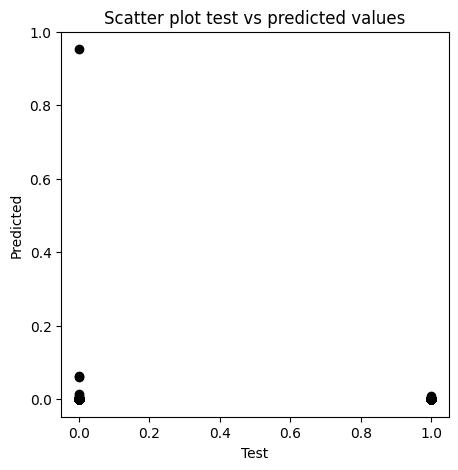

In [19]:
# On validation set
y_pred_val, mae_val, mse_val, rmse_val, oob_score_val, r2_val, feature_imp_val = model_builder.evaluate(X_test=model_builder.X_val,
                                                                    y_test=model_builder.y_val,
                                                                    save_figures=False, saving_base_output_name='testing_val_set')


Evaluation...
4814/4814 [==============================] - 3s 531us/step



Mean Absolute Error (MAE): 0.1512841992639819
Mean Squared Error (MSE): 0.1512839580419382
Root Mean Squared Error (RMSE): 0.38895238531462717
R2: -0.17825001432336074


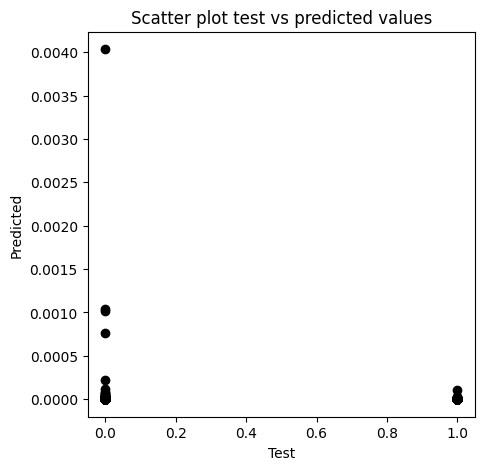

In [20]:
# On test set
y_pred_test, mae_test, mse_test, rmse_test, oob_score_test, r2_test, feature_imp_test = model_builder.evaluate(X_test=model_builder.X_test,
                                                                    y_test=model_builder.y_test,
                                                                    save_figures=False, saving_base_output_name='testing_test_set')

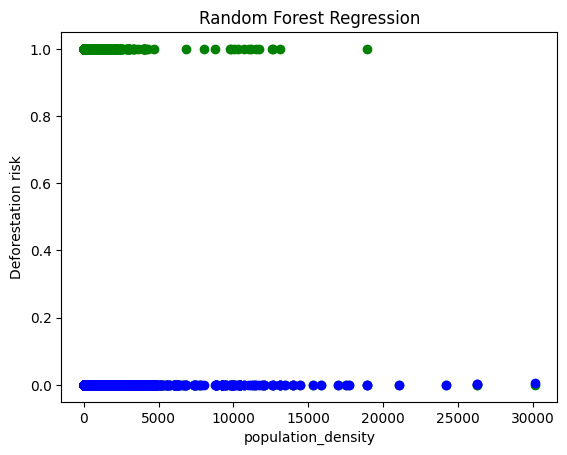

In [21]:
predictor = 'population_density'
plt.scatter(model_builder.X_test[predictor].values, model_builder.y_test, color = 'green')
plt.scatter(model_builder.X_test[predictor].values, y_pred_test, color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel(predictor)
plt.ylabel('Deforestation risk')
plt.show()

# Inference on tiles

In [22]:
model_builder.inference(mask_band='forest_age', 
                        tiles_folder_name='Brazil_Deforestation_Risk_inference_200km2_grid_scale30', 
                        tiles_in_GCP=False,   # Running locally
                        RF_output_folder_temp='TEST_Keras_outputs_temp',
                        path_to_tiles_local='/Users/margauxmforstyhe/Desktop/Brazil_Deforestation_Risk_inference_200km2_grid_scale30'
                       )
